# Homework 6
## Austin Castelo

### 1)

In [44]:
import numpy as np
# This is an implementation of hⱼ
# Written by Austin Castelo
# 11/16/2018
# INPUT: list of values x 
# OUPUT: array of of hⱼ values 
def h(x):
    h = []
    for i in range(len(x)-1):
        h.append(x[i+1]-x[i])
    return h
# This is an implementation of dⱼ
# Written by Austin Castelo
# 11/16/2018
# INPUT: list of values h and a list of fⱼ values 
# OUPUT: array of of dⱼ values
def d(h, f):
    d = []
    for i in range(len(h)-1):
        x = -6/h[i]*(f[i+1]-f[i])+ 6/h[i+1]*(f[i+2]-f[i+1])
        d.append(x)
    return d
# This is an implementation of the A matrix
# Written by Austin Castelo
# 11/16/2018
# INPUT: list of values h 
# OUPUT: an array of arrays with [[aⱼ],[bⱼ], [cⱼ]]
def A(h):
    aⱼ = []
    bⱼ = []
    cⱼ = []
    for i in range(1,len(h)-1):
        aⱼ.append(2*(h[i-1]+h[i]))
        bⱼ.append(h[i])
        cⱼ.append(h[i-1])
    aⱼ.append(2*(h[-2]+h[-1]))
    A = [aⱼ, bⱼ, cⱼ]
    return A

In [45]:
# This is an implementation of a tridiagonal solver for z values
# Written by Austin Castelo
# 11/16/2018
# INPUT: an array A and array d
# OUPUT: returns a list of z values
def Z(A,d):
    aⱼ = A[0]
    bⱼ = A[1]
    cⱼ = A[2]
    lⱼ = []
    mⱼ = [aⱼ[0]]
    for j in range(len(bⱼ)):
        lⱼ.append(cⱼ[j]/mⱼ[j])
        mⱼ.append(aⱼ[j+1]-lⱼ[j]*bⱼ[j])
    y = [d[0]]
    for j in range(1,len(aⱼ)):
        y.append(d[j]-lⱼ[j-1]*y[j-1])
    z = [y[-1]/mⱼ[-1]]
    for j in range(1,len(y)):
        z.insert(0, ((y[-j]-bⱼ[-j]*z[-j])/mⱼ[-j]))
    z.insert(0, 0)
    z.append(0)
    return z

In [46]:
hⱼ = h([0,1,2])
Aⱼ = A(hⱼ)
dⱼ = d(hⱼ,[0,1,16])
Z(Aⱼ,dⱼ)

[0, 21.0, 0]

In [47]:
# This is an implementation of cubic spline interpolation
# Written by Austin Castelo
# 11/16/2018
# INPUT: a list of values h, an array Aⱼ, a list d, a list Z, list of values to interpolate x,
# list of values for interpolation xⱼ, and list of outputs of f(xⱼ) fⱼ
# OUPUT: list of interpolated values Sⱼ
def S(h,Aⱼ,d,Z,x,xⱼ, fⱼ):
    Sⱼ = []
    A = []
    B = []
    C = []
    D = []
    for i in range(len(Z)-1):
        A.append((Z[i+1]-Z[i])/(6*h[i]))
        B.append(Z[i]/2)
        C.append(((fⱼ[i+1]-fⱼ[i])/h[i])-(h[i]*(Z[i+1]+2*Z[i])/6))
        D.append(fⱼ[i])
    print(A)
    print(B)
    print(C)
    print(D)
    for i in x:
        j = 0
        while(i>=xⱼ[j]):
            if i == xⱼ[j]:
                break
            j += 1 
        if(j >= len(A)):
            j = j-1
        if(i < xⱼ[j]):
            j= j-1
        S = A[j]*(i-xⱼ[j])**3 + B[j]*(i - xⱼ[j])**2 + C[j]*(i-xⱼ[j]) + D[j]

        Sⱼ.append(S)
    return Sⱼ

In [48]:
S(hⱼ, Aⱼ, dⱼ, Z(Aⱼ,dⱼ), [0.5,0.7,1.5], [0,1,2], [0,1,16])

[3.5, -3.5]
[0.0, 10.5]
[-2.5, 8.0]
[0, 1]


[-0.8125, -0.5495000000000003, 7.1875]

### 2)

In [54]:
tⱼ = [0, 0.618, 0.935, 1.255, 1.636, 1.905, 2.317, 2.827, 3.33]
xⱼ = [1.5, 0.9, 0.6, 0.35, 0.2, 0.1, 0.5, 1.0, 1.5]
yⱼ = [0.75, 0.90, 1.00, 0.80, 0.45, 0.20, 0.10, 0.20, 0.25]
t = np.linspace(0,3.33, 500)

In [55]:
h_t = h(tⱼ)
A_t = A(h_t)
dₓ = d(h_t, xⱼ)
d_y = d(h_t, yⱼ)
Zₓ = Z(A_t, dₓ)
Z_y = Z(A_t, d_y)

In [56]:
Sₓ = S(h_t,A_t,dₓ,Zₓ,t,tⱼ,xⱼ)

[0.05966397434208965, 1.0172644860367046, -2.369525793189298, 3.937689331515094, -4.707464465924425, 0.4737450275205489, 0.021649265382156783, -0.08205307167677456]
[0.0, 0.11061700843023421, 1.0780355346511405, -1.1967092268105843, 3.3040696791111674, -0.4948541448898457, 0.09069470912555297, 0.12381808516025283]
[-0.9936608901443953, -1.0836617223573608, -0.8835819298657814, -0.5093534930388046, -0.9199051193580574, 1.094338318150935, 0.9285068812828146, 0.9525154540645321]
[1.5, 0.9, 0.6, 0.35, 0.2, 0.1, 0.5, 1.0]


In [57]:
S_y = S(h_t,A_t,d_y,Z_y,t,tⱼ,yⱼ)

[-1.3411567107328426, 2.6604812025125013, -0.5460606327499894, 1.7328107289985133, -1.1813636808095767, -0.59669653797467, -0.04556394833493058, 0.17269232246948657]
[0.0, -2.4865045416986904, 0.043613081890698575, -0.48060512554929097, 1.4999975376960097, 0.5466370472826809, -0.19087987365401152, -0.2605927146064553]
[0.754938382191872, 0.8363302574084175, -0.5830395774114249, -0.987061156001548, -1.2473827100729415, -0.3666472529404338, 0.30527834989801034, 0.18678900216019168]
[0.75, 0.9, 1.0, 0.8, 0.45, 0.2, 0.1, 0.2]


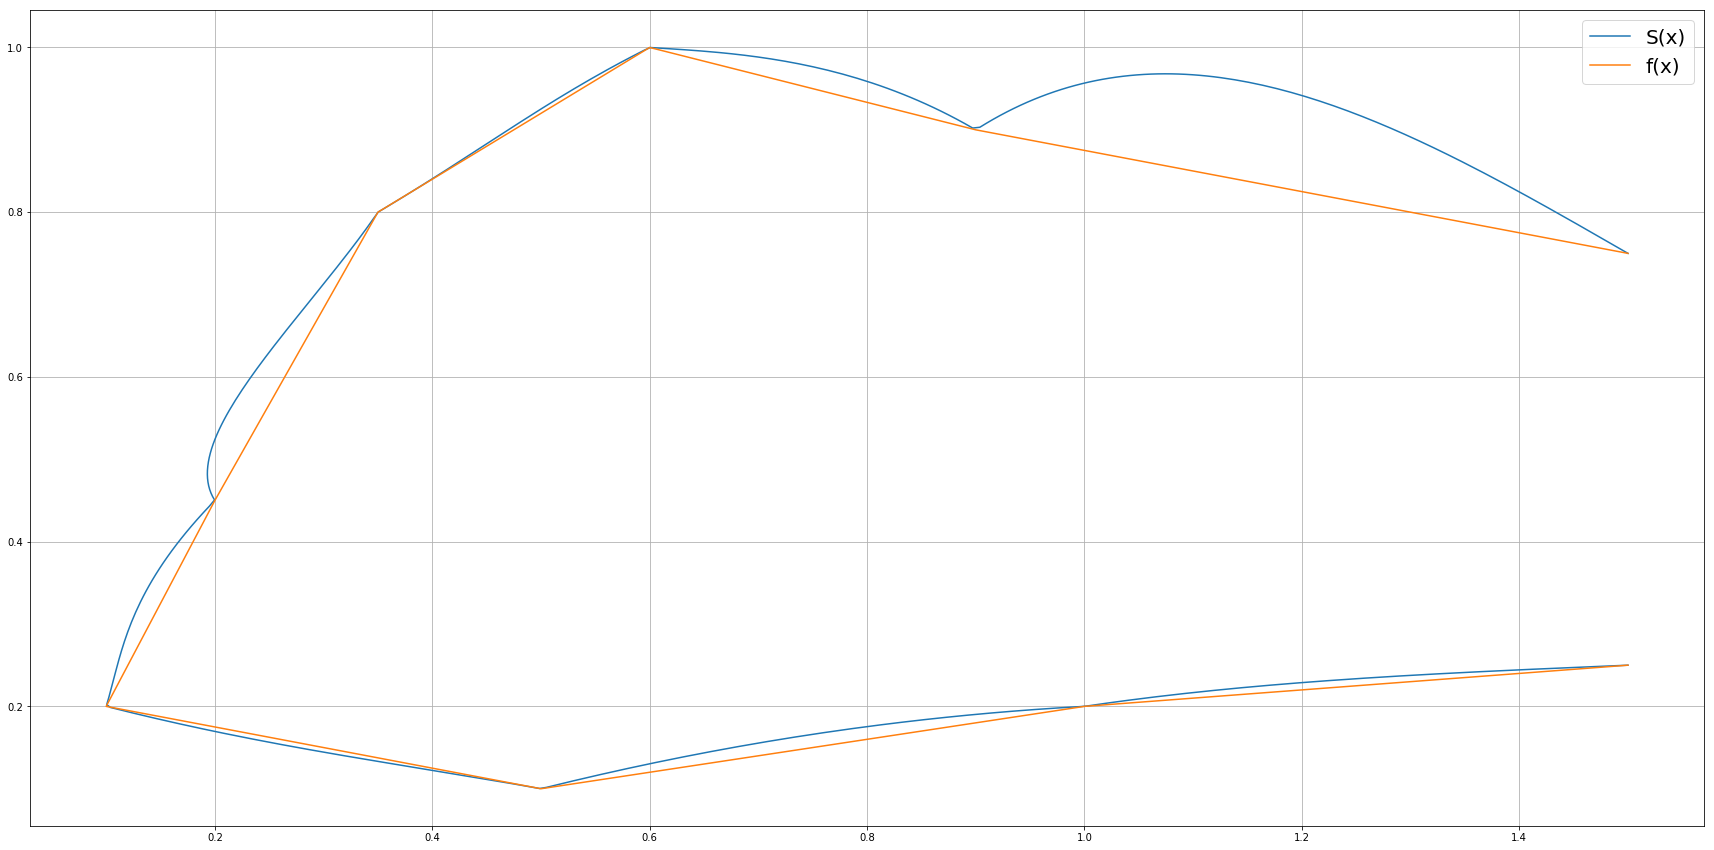

In [58]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30,15), facecolor= "w")
plt.plot(Sₓ, S_y,
         xⱼ, yⱼ
        )
plt.legend(labels = ('S(x)','f(x)'), fontsize = 20)
plt.grid()
plt.show()